In [4]:
%run util.py

# Undamped Pendulum

ODE under consideration is

$$
\theta'' + \sin \theta = 0
$$

Let's set $\theta' = v$ and therefore we have

$$
v' + \sin \theta = 0 \rightarrow v' = - \sin \theta
$$

So the ODE system becomes

$$
\begin{align}
\theta' &= v \\
v' &= - \sin \theta
\end{align}
$$

Used convention:

$$
\theta = X[0], v = X[1]
$$

In [22]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -np.sin(X[0])      ])

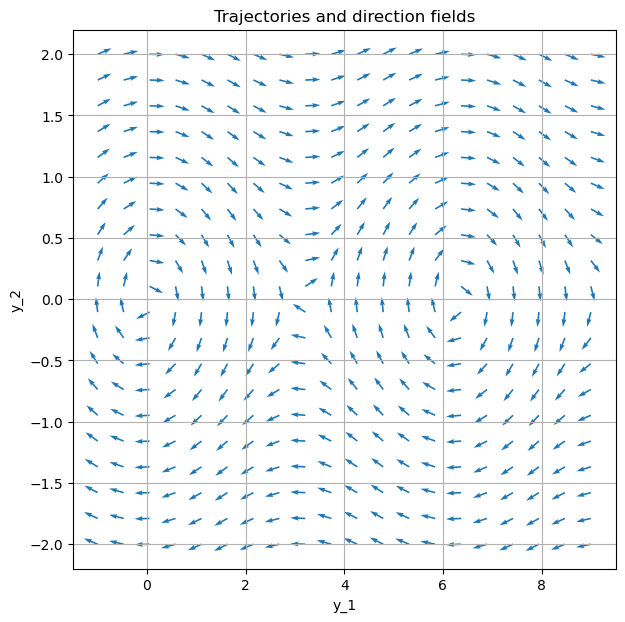

In [23]:
vField(-1, 9, -2, 2, dX_dt, Norm = True)

In [53]:
tmax = 15
a = 2.1
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [a, 0.0], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$\theta, v$')

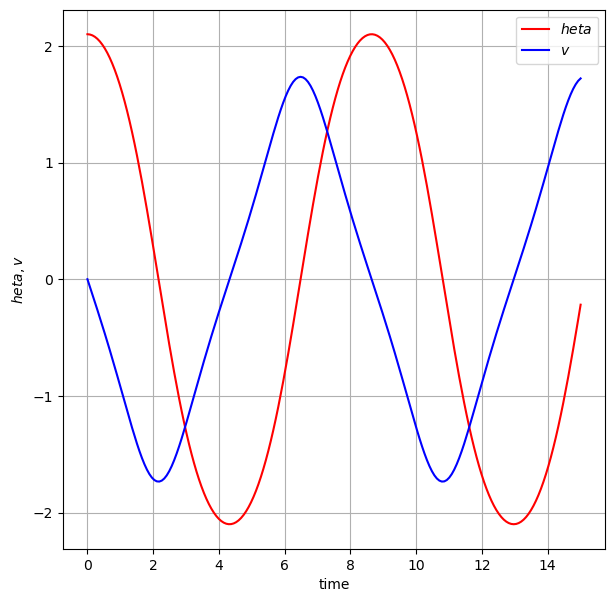

In [52]:
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$\theta$')
plt.plot(t, y2  , 'b-', label='$v$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$\theta, v$')

## Period Calculation

Done in Strogatz, Exercise 6.7.4

The interesting result is that period $T$ depends on the amplitude $a$; this makes intuitively sense as the larger the amplitude is, the slower the pendulm becomes and the longer the period. It is given by

$$
T = 4 K \left( \sin^2 \frac{a}{2} \right)
$$

where $K(\cdot)$ is the *complete elliptic integral of the first kind* which is also available in scipy.special. See below.

For small amplitudes, the period $\approx \pi$, for increasing amplitudes it increases, and approaches $\infty$ for $a \rightarrow \pi$.

In [58]:
import scipy.special as sp
4*sp.ellipk((np.sin(a/2)**2))

np.float64(8.643519610762308)

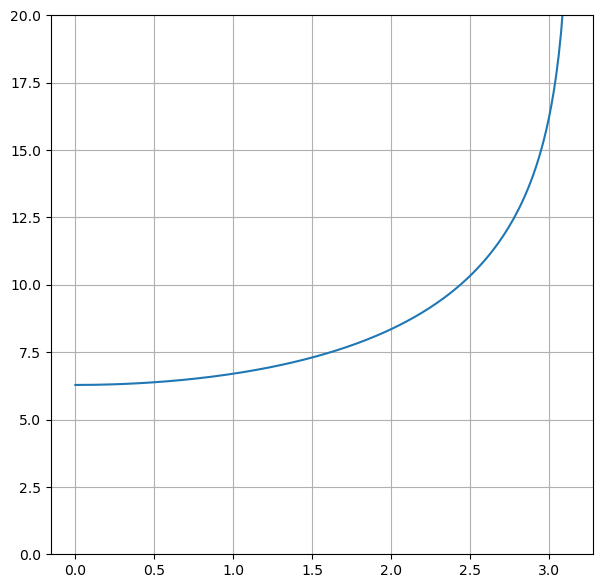

In [61]:
avec = np.linspace(0,np.pi, 200)
plt.plot(avec, 4*sp.ellipk((np.sin(avec/2)**2)))
plt.ylim([0, 20])
plt.grid(True)

## Fixed Point Analysis

There is a saddle point located at $(\pi, o)$ which corresponds to a motionless pendulum point upwards ($\theta = \pi/2$). It is instable (of course!), but when we start there, we stay there...

In [15]:
tmax = 20
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [np.pi, 0], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$\theta, v$')

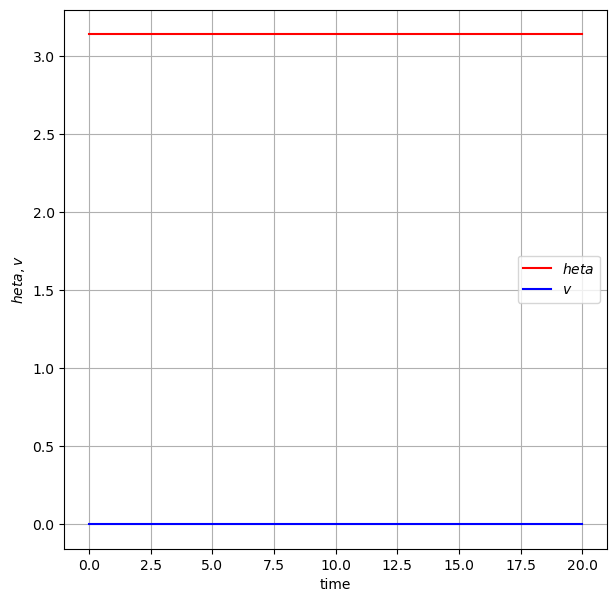

In [16]:
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$\theta$')
plt.plot(t, y2  , 'b-', label='$v$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$\theta, v$')

# Damped Pendulum

ODE under consideration is

$$
\theta'' + b \theta' + \sin \theta = 0
$$

Let's set $\theta' = v$ and therefore we have

$$
v' + b v + \sin \theta = 0 \rightarrow v' = - \sin \theta - bv
$$

The ODE system is therefore

$$
\begin{align}
\theta' &= v \\
v' &= - \sin \theta - bv
\end{align}
$$


In [15]:
b = 0.2

In [16]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -np.sin(X[0]) - b*X[1]     ])

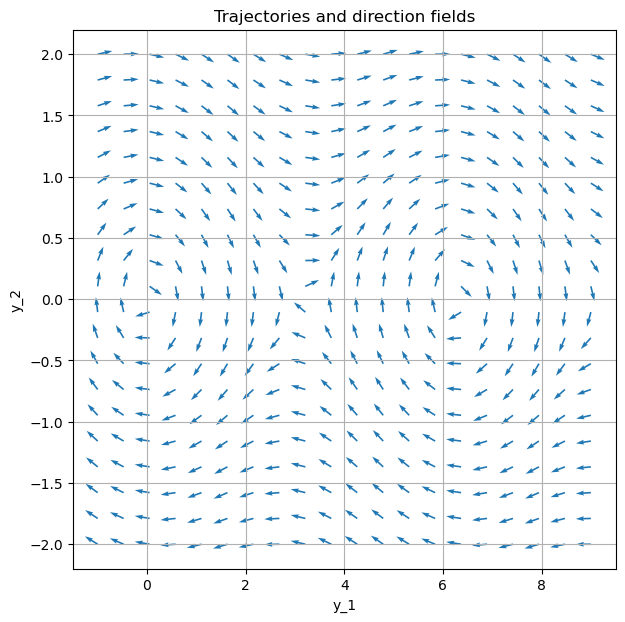

In [17]:
vField(-1, 9, -2, 2, dX_dt, Norm = True)

In [18]:
tmax = 50
t  = np.linspace(0, tmax, 1000)
X, infodict = solveODE(dX_dt, [0., 2.2], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$\theta, v$')

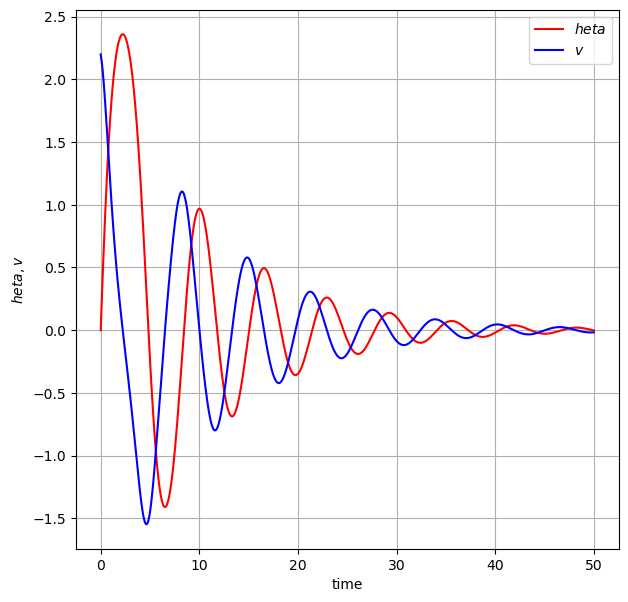

In [19]:
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$\theta$')
plt.plot(t, y2  , 'b-', label='$v$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$\theta, v$')